In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import cm
from molecular_simulations.lj_eos_kn import PLJ

In [2]:
df = pd.read_csv("../data/nvt_estimates.csv")
colors = cm.plasma(np.linspace(0, 0.9, df["T"].nunique()))

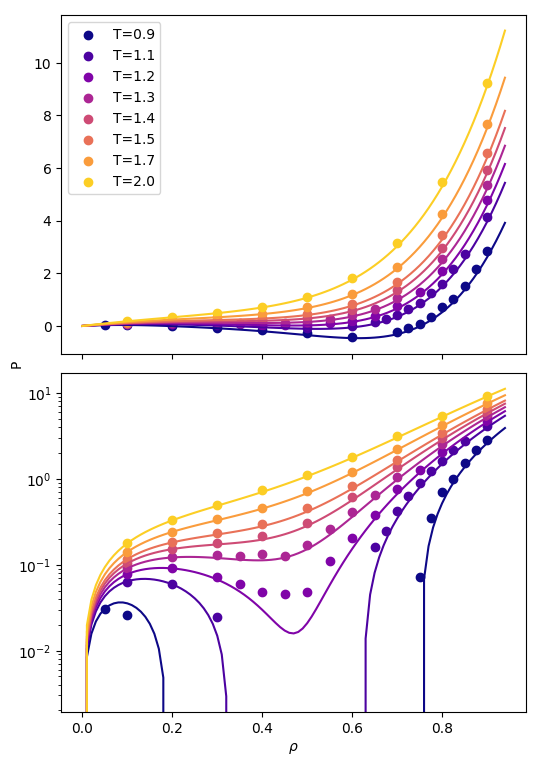

In [3]:
fig, axs = plt.subplots(2, 1, figsize=(6, 8), tight_layout=True, sharex=True)
for i, T in enumerate(df["T"].sort_values().unique()):
    view = df.loc[df["T"] == T]
    mesh = np.arange(0.95, step=0.01)

    for j in range(2):
        axs[j].scatter(view["rho"], view["P"], color=colors[i], label="T={}".format(T))
        axs[j].plot(mesh, PLJ(T, mesh), color=colors[i])
    axs[1].set_yscale("log")
axs[0].legend()
# add a big axis, hide frame
fig.add_subplot(111, frameon=False)
plt.tick_params(
    labelcolor="none", which="both", top=False, bottom=False, left=False, right=False
)
plt.xlabel(r"$\rho$")
plt.ylabel("P");